In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mplfinance as mpl

file= "C:/Users/user/Documents/Crypto-price-forecast-model/ETH-USD (2018-2023).csv"
df= pd.read_csv(file)

df.info() # as you can see blow that the Datatype of date is object so we need to convert it to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   Open       1827 non-null   float64
 2   High       1827 non-null   float64
 3   Low        1827 non-null   float64
 4   Close      1827 non-null   float64
 5   Adj Close  1827 non-null   float64
 6   Volume     1827 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [5]:
df.Date = pd.to_datetime(df.Date)
df.info() # now you can see that the datatype of dates has changed to datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1827 non-null   datetime64[ns]
 1   Open       1827 non-null   float64       
 2   High       1827 non-null   float64       
 3   Low        1827 non-null   float64       
 4   Close      1827 non-null   float64       
 5   Adj Close  1827 non-null   float64       
 6   Volume     1827 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


In [6]:
df.head(10) # The problema with this data is that the index is numbers from 0 onwards, but we need our date to be the index.
# WE need date as index because if we want data of lets say 2018-11-7 then we would just type the date and it will show the data
# But if the date is not the index then we would have to type the default index number(which is 0) to get the data!
# don't worry you will get idea once we move forwards...

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-07,218.899002,221.651993,216.796005,217.182999,217.182999,1927830000
1,2018-11-08,217.326996,218.337997,212.199005,212.231003,212.231003,1769080000
2,2018-11-09,211.987000,213.315994,209.514999,210.074005,210.074005,1554750000
3,2018-11-10,209.975006,213.856995,209.804993,212.533005,212.533005,1377760000
4,2018-11-11,212.479004,212.998993,208.867996,211.339996,211.339996,1501600000
5,2018-11-12,211.513000,212.623001,208.923996,210.417999,210.417999,1452380000
6,2018-11-13,210.149002,210.514999,206.134995,206.826004,206.826004,1610260000
7,2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2595330000
8,2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2638410000
9,2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2015330000


In [7]:
df = df.set_index('Date')
df.head(10)
# It is showing this error because once I have converted Date into a index then it will no longer be counted as a column.
# Therefore, If you run the code second time it will say that there is no such column as Date (Cuz it is now the index)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-07,218.899002,221.651993,216.796005,217.182999,217.182999,1927830000
2018-11-08,217.326996,218.337997,212.199005,212.231003,212.231003,1769080000
2018-11-09,211.987000,213.315994,209.514999,210.074005,210.074005,1554750000
2018-11-10,209.975006,213.856995,209.804993,212.533005,212.533005,1377760000
2018-11-11,212.479004,212.998993,208.867996,211.339996,211.339996,1501600000
2018-11-12,211.513000,212.623001,208.923996,210.417999,210.417999,1452380000
2018-11-13,210.149002,210.514999,206.134995,206.826004,206.826004,1610260000
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2595330000
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2638410000


In [8]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-29,1776.563965,1810.488647,1766.052979,1795.546021,1795.546021,4358528382
2023-10-30,1795.589111,1829.249512,1779.364502,1810.088623,1810.088623,7534051038
2023-10-31,1810.131592,1819.972656,1784.567627,1816.458984,1816.458984,6477922747
2023-11-01,1815.872070,1858.312866,1786.409546,1847.089722,1847.089722,10628825648
2023-11-02,1847.259888,1873.885010,1790.114746,1800.620972,1800.620972,9004197724
2023-11-03,1800.916504,1835.072510,1779.635498,1832.795166,1832.795166,7622864055
2023-11-04,1833.368896,1867.261353,1825.736572,1857.698608,1857.698608,4845080427
2023-11-05,1857.395630,1911.608643,1848.620117,1894.157715,1894.157715,8867152645
2023-11-06,1894.027100,1914.582642,1871.973022,1899.837402,1899.837402,8104122602


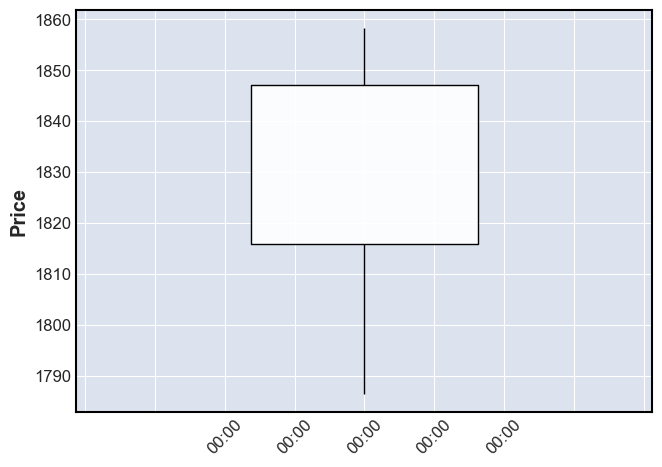

In [15]:
mpl.plot(df.loc[['2023-11-01']], type='candle') # Scattering or making candles of the dataset of crypto price for the last 5 years would give a error.

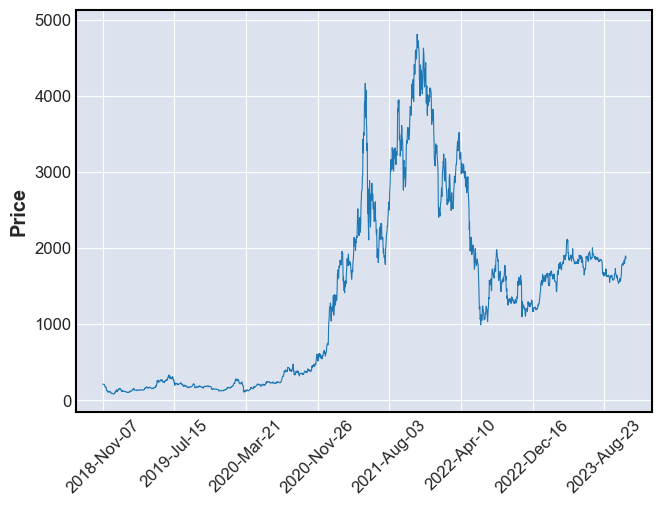

In [16]:
mpl.plot(df, type='line') # solving the error by converting the scatter plot into a line plot

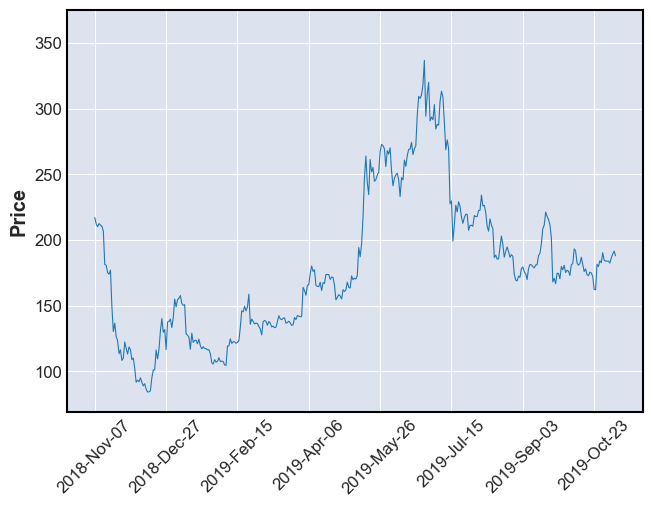

In [17]:
mpl.plot(df.loc['2018-11-07':'2019-11-07'], type='line') 
# using datafram.loc[index1:index2] to get the dataset of that specific time

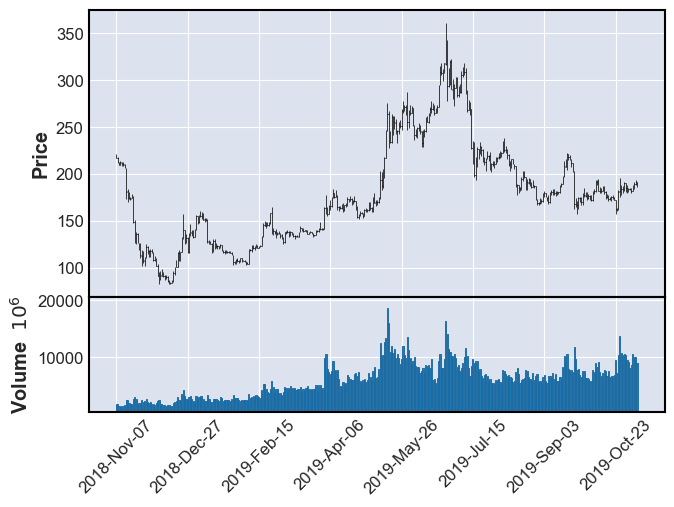

In [18]:
#PLotting the volumeof data with the OHLC chart
mpl.plot(df.loc['2018-11-07':'2019-11-07'], type='ohlc', volume=True)

I will help you zoom in to the graph of the date that you will provide me :)
Enter the starting date of the graph (Y-M-D): 2023-10-01
Enter the ending date of the graph (Y-M-D): 2023-11-01
Enter the type of graph (candle, line, ohlc): candle
Enter whether you want volume in your graph or not (yes or no): yes


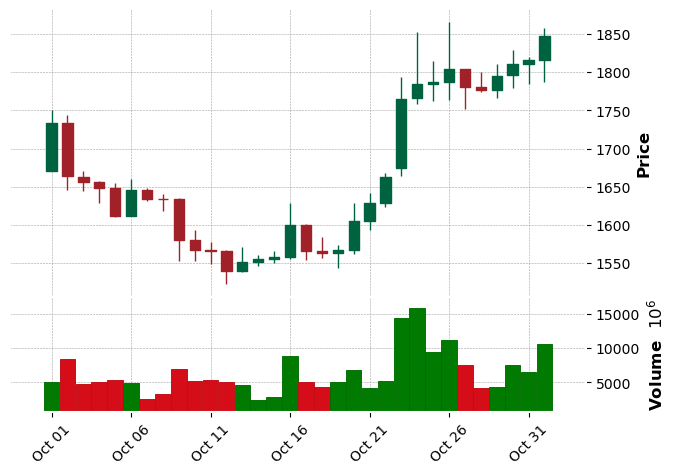

In [20]:
# In this cell I will be creating a code that will take input from the user and create the graph according to that input.

def string_to_boolean(s):
    if s in ['True', 'true', 'Yes', 'yes']:
        return(True)
    else:
        return(False)
    
print('I will help you zoom in to the graph of the date that you will provide me :)')
index_1 = input('Enter the starting date of the graph (Y-M-D): ')
index_2 = input('Enter the ending date of the graph (Y-M-D): ')
graph = input('Enter the type of graph (candle, line, ohlc): ')
str_volume = input('Enter whether you want volume in your graph or not (yes or no): ')

volume = string_to_boolean(str_volume)

mpl.plot(df.loc[index_1:index_2], style='charles', type=graph, volume=volume)

## What is a OHLC?
Open-High-Low-Close.

## What is my objective for this model?
Firstly, I want to encode this candlestick patterns into a table format using feature engineering. After that, I want to train a model to learn different candlestick patterns and their affect on the future price of the cryptocurency. Then I want to train that model on a huge historic dataset(Approximately of 5 years) of the cryptocurrency of my choice(which is Ethereum). lastly, I want to use that trained/ fitted model to predict/ forecast the future closing price of that cryptocurrency and then convert it back into a candlestick chart.

In [21]:
df.head(10) # The column 'Adj Close' is useless so I will remove that column from df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-07,218.899002,221.651993,216.796005,217.182999,217.182999,1927830000
2018-11-08,217.326996,218.337997,212.199005,212.231003,212.231003,1769080000
2018-11-09,211.987000,213.315994,209.514999,210.074005,210.074005,1554750000
2018-11-10,209.975006,213.856995,209.804993,212.533005,212.533005,1377760000
2018-11-11,212.479004,212.998993,208.867996,211.339996,211.339996,1501600000
2018-11-12,211.513000,212.623001,208.923996,210.417999,210.417999,1452380000
2018-11-13,210.149002,210.514999,206.134995,206.826004,206.826004,1610260000
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2595330000
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2638410000


In [22]:
df = df.drop('Adj Close', axis=1)
df.tail(10) 
print(df.loc['2023-11-05'])

Open      1.857396e+03
High      1.911609e+03
Low       1.848620e+03
Close     1.894158e+03
Volume    8.867153e+09
Name: 2023-11-05 00:00:00, dtype: float64


In [25]:
# I tried to make this useless function to identify patterns before I knew about TA-Lib ;(

def candlestick_info(Open, High, Low, Close):
    Body= Close - Open
    if Body<0: # For Bearish Candle becuase body = -
        Upper_shadow= High - Open
        Lower_shadow= Close - Low
        print('This is a Bearish candle')
        print('Upper_shadow: ', Upper_shadow)
        print('Body: ', Body)
        print('Lower_shadow: ', Lower_shadow)
    elif Body>0: # For Bullish Candle because body = +
        Upper_shadow= High - Close
        Lower_shadow= Open - Low
        print('This is a Bullish candle')
        print('Upper_shadow: ', Upper_shadow)
        print('Body: ', Body)
        print('Lower_shadow: ', Lower_shadow)
    

In [24]:
Date='2023-11-05'

Open= df.loc[Date].Open
High= df.loc[Date].High
Low= df.loc[Date].Low
Close= df.loc[Date].Close

candlestick_info(Open, High, Low, Close)

This is a Bullish candle
Upper_shadow:  17.450927999999976
Body:  36.76208500000007
Lower_shadow:  8.775513000000046
